## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [3]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. To use these features, we must clean the data.

To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [4]:
# answer below:
reviews2 = reviews.drop(columns=['App', 'Category', 'Size', 'Installs', 
                                 'Genres', 'Last Updated', 'Current Ver',  'Android Ver' ])
reviews2.head()

,Rating,Reviews,Type,Price,Content Rating
0,4.1,159,Free,0,Everyone
1,3.9,967,Free,0,Everyone
2,4.7,87510,Free,0,Everyone
3,4.5,215644,Free,0,Teen
4,4.3,967,Free,0,Everyone


Check for missing values and remove all rows containing missing values

In [5]:
# answer below:
reviews2.isnull().sum()/reviews2.isnull().count()

Rating            0.135965
Reviews           0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
dtype: float64

In [6]:
reviews2.dropna(inplace=True)
reviews2.isnull().sum()/reviews2.isnull().count()

Rating            0.0
Reviews           0.0
Type              0.0
Price             0.0
Content Rating    0.0
dtype: float64

Remove outliers from the Type and Content Rating columns (very rare values that won't train well).

In [7]:
# answer below:
reviews2['Type'].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [8]:
reviews2['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [9]:
reviews3 = reviews2.iloc[np.where(~reviews2['Content Rating'].isin(['Unrated','Adults only 18+']))]

In [10]:
reviews3['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

Convert the Type and Content Rating columns to a numeric format, whether by one-hot encoding, ordinal encoding, or similar.

In [11]:
# answer below:
reviews4 = pd.get_dummies(reviews3, columns=['Type', 'Content Rating'], drop_first=True)
reviews4.head()

,Rating,Reviews,Price,Type_Paid,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,4.1,159,0,0,0,0,0
1,3.9,967,0,0,0,0,0
2,4.7,87510,0,0,0,0,0
3,4.5,215644,0,0,0,0,1
4,4.3,967,0,0,0,0,0


Finally, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [12]:
# answer below:
reviews4.dtypes

Rating                         float64
Reviews                         object
Price                           object
Type_Paid                        uint8
Content Rating_Everyone 10+      uint8
Content Rating_Mature 17+        uint8
Content Rating_Teen              uint8
dtype: object

In [13]:
reviews4['Reviews'] = pd.to_numeric(reviews4['Reviews'])
reviews4['Price'] = pd.to_numeric(reviews4['Price'].str.strip('$'))

In [14]:
reviews4.dtypes

Rating                         float64
Reviews                          int64
Price                          float64
Type_Paid                        uint8
Content Rating_Everyone 10+      uint8
Content Rating_Mature 17+        uint8
Content Rating_Teen              uint8
dtype: object

In [15]:
reviews4.isnull().sum()/reviews4.isnull().count()

Rating                         0.0
Reviews                        0.0
Price                          0.0
Type_Paid                      0.0
Content Rating_Everyone 10+    0.0
Content Rating_Mature 17+      0.0
Content Rating_Teen            0.0
dtype: float64

In [16]:
reviews4.head()

,Rating,Reviews,Price,Type_Paid,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,4.1,159,0.0,0,0,0,0
1,3.9,967,0.0,0,0,0,0
2,4.7,87510,0.0,0,0,0,0
3,4.5,215644,0.0,0,0,0,1
4,4.3,967,0.0,0,0,0,0


Perform a train test split with 20% of the data in the test sample.

In [17]:
# answer below:
from sklearn.model_selection import train_test_split
y = y = reviews4['Rating']
X = reviews4.drop('Rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now generate a linear model using statsmodels and produce a p value for each coefficient in the model. Analyze the results. (Look at the results table and at a homoscedasticity plot.)

In [18]:
# answer below:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train_constant).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.35
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           6.83e-14
Time:                        16:44:01   Log-Likelihood:                -5703.4
No. Observations:                7489   AIC:                         1.142e+04
Df Residuals:                    7482   BIC:                         1.147e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.1724      0.007    596.152      0.000       4.159       4.186
Reviews                      1.271e-08   2.11e-09      6.017      0.000    8.57e-09    1.69e-08
Price                          -0.0012      0.000     -2.970      0.003      -0.002      -0.000
Type_Paid                       0.0968      0.025      3.942      0.000       0.049       0.145
Content Rating_Everyone 10+     0.0546      0.030      1.831      0.067      -0.004       0.113
Content Rating_Mature 17+      -0.0691      0.028     -2.510      0.012      -0.123      -0.015
Content Rating_Teen             0.0432      0.019      2.262      0.024       0.006       0.081
==============================================================================
Omnibus:                     2957.462   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14975.458
Skew:                          -1.853   Prob(JB):                         0.00
Kurtosis:                       8.853   Cond. No.                     1.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

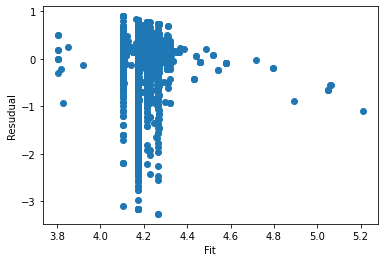

In [19]:
predictions = results.predict(X_train_constant)
residual = y_train - predictions
plt.scatter(predictions, residual)
plt.xlabel('Fit')
plt.ylabel('Resudual')
plt.show()

Scale your predictors and refit the linear model.

* How does this change the coefficients?
* How does this change the coefficients' p values?
* How does this change model performance?

In [20]:
# answer below:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_constant = sm.add_constant(X_train_scaled)

In [21]:
results2 = sm.OLS(y_train, X_train_scaled_constant).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.35
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           6.83e-14
Time:                        16:44:02   Log-Likelihood:                -5703.4
No. Observations:                7489   AIC:                         1.142e+04
Df Residuals:                    7482   BIC:                         1.147e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1724      0.007    596.152      0.000       4.159       4.186
x1             0.9936      0.165      6.017      0.000       0.670       1.317
x2            -0.4645      0.156     -2.970      0.003      -0.771      -0.158
x3             0.0968      0.025      3.942      0.000       0.049       0.145
x4             0.0546      0.030      1.831      0.067      -0.004       0.113
x5            -0.0691      0.028     -2.510      0.012      -0.123      -0.015
x6             0.0432      0.019      2.262      0.024       0.006       0.081
==============================================================================
Omnibus:                     2957.462   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14975.458
Skew:                          -1.853   Prob(JB):                         0.00
Kurtosis:                       8.853   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

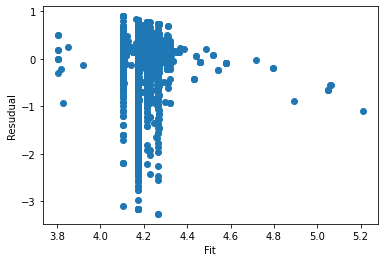

In [22]:
predictions2 = results2.predict(X_train_scaled_constant)
residual2 = y_train - predictions2
plt.scatter(predictions2, residual2)
plt.xlabel('Fit')
plt.ylabel('Resudual')
plt.show()